Iniciando a exploração do dataset final: ../reports/classificacao_final_revisada.csv
Dataset com 1385 empresas carregado com sucesso.

--- Gerando Análise 1: Distribuição por Missão ---


/tmp/ipykernel_18742/561888886.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(PRETTY_LABELS, rotation=45, ha='right')


Gráfico de distribuição salvo em: ../reports/visualizacoes/distribuicao_por_missao.png


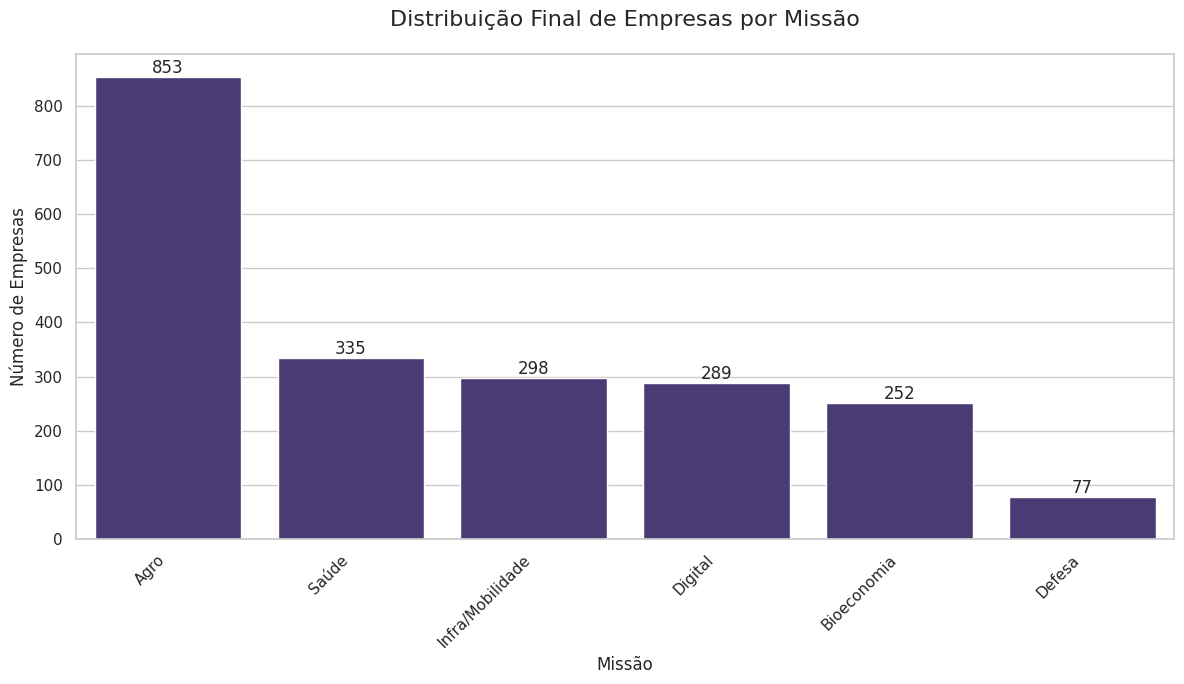


--- Gerando Análise 2: Coocorrência de Missões ---
Heatmap de coocorrência salvo em: ../reports/visualizacoes/heatmap_coocorrencia.png


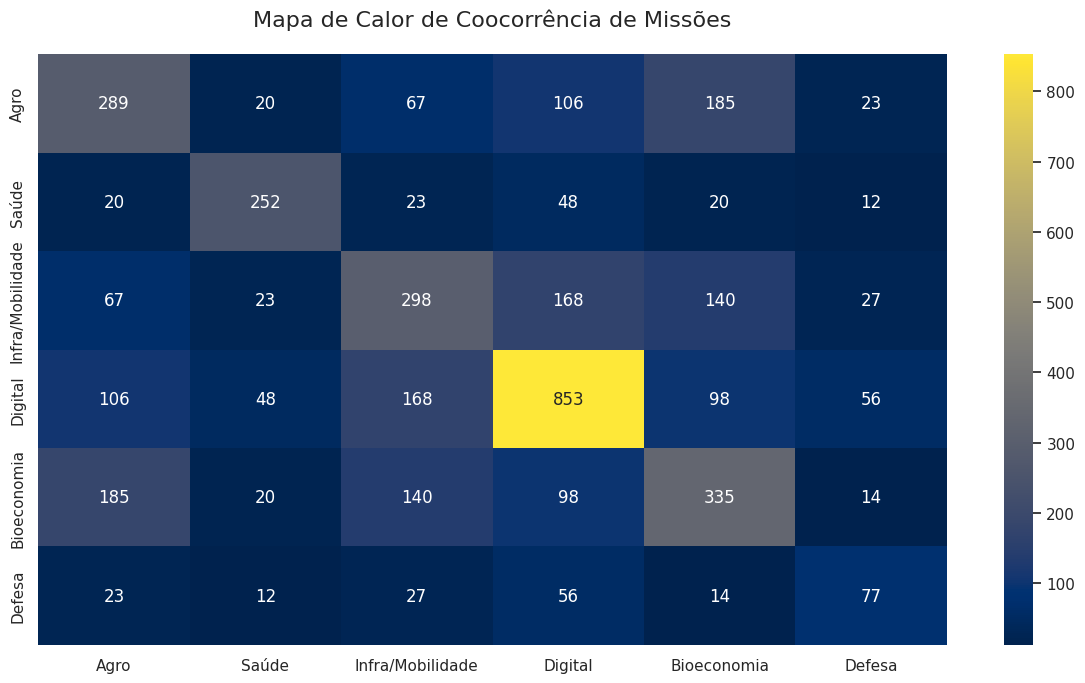


--- Gerando Análise 3: Missões por Categoria da Organização ---


/tmp/ipykernel_18742/561888886.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missions_by_cat['missao'] = df_missions_by_cat['missao'].map(mission_label_map)


Gráfico de distribuição por categoria salvo em: ../reports/visualizacoes/distribuicao_por_categoria.png


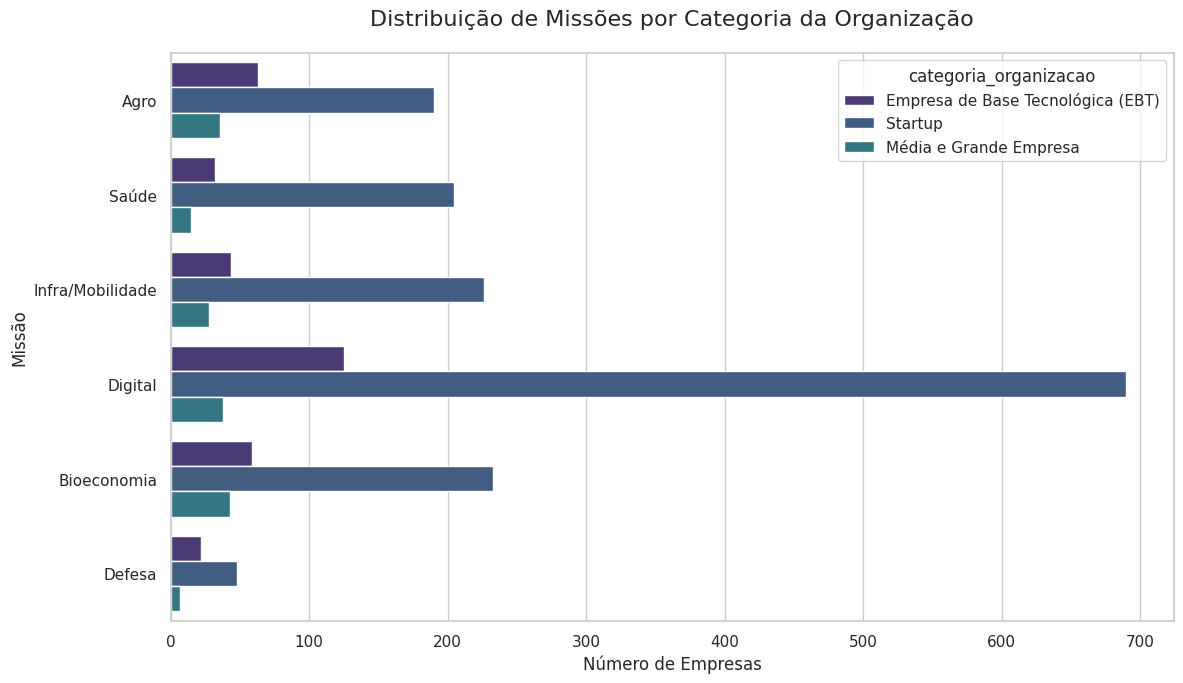


--- Análise Exploratória Concluída ---


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURAÇÃO ---
# Caminho para o nosso dataset final e revisado
FINAL_DATASET_PATH = os.path.join('../reports', 'classificacao_final_revisada.csv')
# Diretório para salvar as imagens geradas
OUTPUT_DIR = '../reports/visualizacoes'

# Nomes das colunas de missão
TARGET_LABELS = ['M1_Agro', 'M2_Saude', 'M3_Infra_Mobilidade', 'M4_Transformacao_Digital', 'M5_Bioeconomia_Energia', 'M6_Defesa_Soberania']
# Nomes mais amigáveis para os gráficos
PRETTY_LABELS = ['Agro', 'Saúde', 'Infra/Mobilidade', 'Digital', 'Bioeconomia', 'Defesa']

def set_plot_style():
    """Define um estilo visual agradável para os gráficos."""
    sns.set_theme(style="whitegrid", palette="viridis")
    plt.rcParams['figure.figsize'] = (12, 7)
    plt.rcParams['font.size'] = 12

def main():
    """
    Função principal para carregar o dataset final e gerar explorações e visualizações.
    """
    print(f"Iniciando a exploração do dataset final: {FINAL_DATASET_PATH}")
    
    # 1. Carregar o dataset
    try:
        df = pd.read_csv(FINAL_DATASET_PATH)
    except FileNotFoundError:
        print(f"ERRO: Arquivo não encontrado em '{FINAL_DATASET_PATH}'.")
        return
        
    print(f"Dataset com {len(df)} empresas carregado com sucesso.")
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    set_plot_style()

    # --- ANÁLISE 1: Distribuição de Empresas por Missão ---
    print("\n--- Gerando Análise 1: Distribuição por Missão ---")
    mission_counts = df[TARGET_LABELS].sum().sort_values(ascending=False)
    
    plt.figure()
    ax = sns.barplot(x=mission_counts.index, y=mission_counts.values)
    ax.set_xticklabels(PRETTY_LABELS, rotation=45, ha='right')
    ax.set_title('Distribuição Final de Empresas por Missão', fontsize=16, pad=20)
    ax.set_ylabel('Número de Empresas')
    ax.set_xlabel('Missão')
    # Adiciona os números no topo das barras
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()
    plot_path = os.path.join(OUTPUT_DIR, 'distribuicao_por_missao.png')
    plt.savefig(plot_path)
    print(f"Gráfico de distribuição salvo em: {plot_path}")
    plt.show()

    # --- ANÁLISE 2: Coocorrência de Missões (Heatmap) ---
    print("\n--- Gerando Análise 2: Coocorrência de Missões ---")
    # Para o heatmap, usamos apenas as empresas que foram classificadas em pelo menos uma missão
    df_classified = df[df[TARGET_LABELS].sum(axis=1) > 0]
    co_occurrence_matrix = df_classified[TARGET_LABELS].T.dot(df_classified[TARGET_LABELS])
    
    plt.figure()
    ax = sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='cividis', xticklabels=PRETTY_LABELS, yticklabels=PRETTY_LABELS)
    ax.set_title('Mapa de Calor de Coocorrência de Missões', fontsize=16, pad=20)
    plt.tight_layout()
    plot_path = os.path.join(OUTPUT_DIR, 'heatmap_coocorrencia.png')
    plt.savefig(plot_path)
    print(f"Heatmap de coocorrência salvo em: {plot_path}")
    plt.show()

    # --- ANÁLISE 3: Distribuição por Categoria da Organização ---
    print("\n--- Gerando Análise 3: Missões por Categoria da Organização ---")
    # Derrete o dataframe para ter uma linha por empresa e por missão
    df_melted = df.melt(
        id_vars=['categoria_organizacao'],
        value_vars=TARGET_LABELS,
        var_name='missao',
        value_name='presente'
    )
    df_missions_by_cat = df_melted[df_melted['presente'] == 1]
    
    # Mapeia para nomes amigáveis
    mission_label_map = dict(zip(TARGET_LABELS, PRETTY_LABELS))
    df_missions_by_cat['missao'] = df_missions_by_cat['missao'].map(mission_label_map)

    plt.figure()
    ax = sns.countplot(y='missao', hue='categoria_organizacao', data=df_missions_by_cat, order=PRETTY_LABELS)
    ax.set_title('Distribuição de Missões por Categoria da Organização', fontsize=16, pad=20)
    ax.set_xlabel('Número de Empresas')
    ax.set_ylabel('Missão')
    plt.tight_layout()
    plot_path = os.path.join(OUTPUT_DIR, 'distribuicao_por_categoria.png')
    plt.savefig(plot_path)
    print(f"Gráfico de distribuição por categoria salvo em: {plot_path}")
    plt.show()
    
    print("\n--- Análise Exploratória Concluída ---")


if __name__ == "__main__":
    main()

